In [1]:
import json
from copy import deepcopy
import numpy as np

In [2]:
with open('once-through.json') as f:
    ot = json.load(f)

In [3]:
lwr = ot['simulation']['facility'][1]

In [4]:
lwr

{'config': {'Reactor': {'assem_size': 33000,
   'cycle_time': 18,
   'fuel_incommods': {'val': 'Fresh-UOX-Fuel'},
   'fuel_inrecipes': {'val': 'FF-UOX'},
   'fuel_outcommods': {'val': 'Used-UOX-Fuel'},
   'fuel_outrecipes': {'val': 'UF-UOX'},
   'n_assem_batch': 1,
   'n_assem_core': 3,
   'power_cap': 1000,
   'refuel_time': 1}},
 'lifetime': 720,
 'name': 'LWR'}

In [31]:
n_rx = 100
np.linspace(1, 40 * 12, n_rx, dtype=int)

array([  1,   5,  10,  15,  20,  25,  30,  34,  39,  44,  49,  54,  59,
        63,  68,  73,  78,  83,  88,  92,  97, 102, 107, 112, 117, 121,
       126, 131, 136, 141, 146, 150, 155, 160, 165, 170, 175, 180, 184,
       189, 194, 199, 204, 209, 213, 218, 223, 228, 233, 238, 242, 247,
       252, 257, 262, 267, 271, 276, 281, 286, 291, 296, 300, 305, 310,
       315, 320, 325, 330, 334, 339, 344, 349, 354, 359, 363, 368, 373,
       378, 383, 388, 392, 397, 402, 407, 412, 417, 421, 426, 431, 436,
       441, 446, 450, 455, 460, 465, 470, 475, 480])

In [32]:
lwrs = []
for i, life in enumerate(np.linspace(1, 40 * 12, n_rx, dtype=int), 0):
    l = deepcopy(lwr)
    l['name'] = 'LWR-Init{0:02}'.format(i)
    l['lifetime'] = int(life)
    l['config']['Reactor']['cycle_step'] = 18 - int(life%18)
    lwrs.append(l)

In [33]:
with open('initial-lwrs.json', 'w') as f:
    json.dump(lwrs, f)

In [34]:
ifl = [{'number': '1', 'prototype': l['name']} for l in lwrs]

In [35]:
ifl[-1]

{'number': '1', 'prototype': 'LWR-Init99'}

In [36]:
with open('initial-facs.json', 'w') as f:
    json.dump(ifl, f)

Nicely done

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
import cymetric as cym

/home/scopatz/miniconda/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [12]:
db = cym.dbopen('ot.h5')

In [13]:
evaler = cym.Evaluator(db)

In [14]:
ts = evaler.eval('TimeSeriesPower')

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame({'Time': ts.Time.apply(lambda x: x//12), 
                   'GWe': ts.Value.apply(lambda x: 1e-3*x/12)})

In [17]:
grouped = df.groupby('Time').sum()

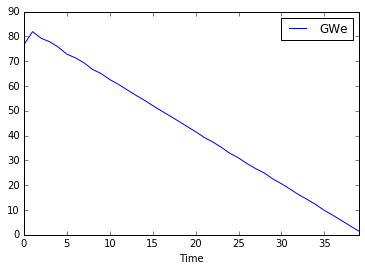

In [18]:
grouped.plot()

In [19]:
250000//12

20833

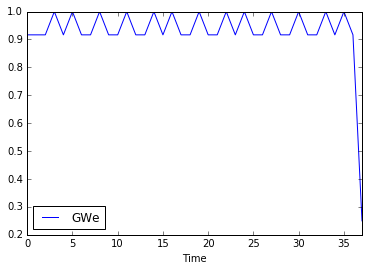

In [25]:
agn = ts[ts.AgentId == 190]
df = pd.DataFrame({'Time': agn.Time.apply(lambda x: x//12), 
                   'GWe': agn.Value.apply(lambda x: 1e-3*x/12)})
grouped = df.groupby('Time').sum()
grouped.plot()

In [21]:
1000 * 12 / 12

1000.0